In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
data=pd.read_csv('airlines.csv')

In [4]:
data

ID  Age Agency    Agency Type  Commision (in value)    Destination  \
0      45341   28    C2B       Airlines                 28.13      SINGAPORE   
1      12958   37    JZI       Airlines                 12.95    PHILIPPINES   
2      18233   27    EPX  Travel Agency                  0.00  UNITED STATES   
3      31742   36    EPX  Travel Agency                  0.00   SAUDI ARABIA   
4      14381   26    CWT  Travel Agency                 23.76       THAILAND   
...      ...  ...    ...            ...                   ...            ...   
62283  36315   36    EPX  Travel Agency                  0.00      HONG KONG   
62284   2511   56    JZI       Airlines                  9.10      AUSTRALIA   
62285  16874   36    EPX  Travel Agency                  0.00          ITALY   
62286  14801   29    CWT  Travel Agency                 11.88      AUSTRALIA   
62287   5550   44    EPX  Travel Agency                  0.00       THAILAND   

      Distribution Channel  Duration Gender  Net Sales  \
0                   Online        34      F      112.5   
1                   Online        53      F       37.0   
2                   Online        28    NaN       13.0   
3                   Online         1    NaN       34.0   
4                   Online        33    NaN       39.6   
...                    ...       ...    ...        ...   
62283               Online        17    NaN       28.0   
62284               Online         9      F       26.0   
62285               Online       216    NaN       20.0   
62286               Online        37    NaN       19.8   
62287               Online        70    NaN       20.0   

                          Product Name  Claim  
0                          Silver Plan      1  
1                           Basic Plan      0  
2                    Cancellation Plan      0  
3                    Cancellation Plan      0  
4      Rental Vehicle Excess Insurance      0  
...                                ...    ...  
62283         2 way Comprehensive Plan      0  
62284                       Basic Plan      0  
62285         2 way Comprehensive Plan      1  
62286  Rental Vehicle Excess Insurance      1  
62287                Cancellation Plan      0  

[62288 rows x 12 columns]

In [5]:
data.isnull().sum()

ID                          0
Age                         0
Agency                      0
Agency Type                 0
Commision (in value)        0
Destination                 0
Distribution Channel        0
Duration                    0
Gender                  39575
Net Sales                   0
Product Name                0
Claim                       0
dtype: int64

In [6]:
data.drop('Gender',axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62288 entries, 0 to 62287
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    62288 non-null  int64  
 1   Age                   62288 non-null  int64  
 2   Agency                62288 non-null  object 
 3   Agency Type           62288 non-null  object 
 4   Commision (in value)  62288 non-null  float64
 5   Destination           62288 non-null  object 
 6   Distribution Channel  62288 non-null  object 
 7   Duration              62288 non-null  int64  
 8   Net Sales             62288 non-null  float64
 9   Product Name          62288 non-null  object 
 10  Claim                 62288 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 5.2+ MB


In [8]:
data.describe()

ID           Age  Commision (in value)      Duration  \
count  62288.000000  62288.000000          62288.000000  62288.000000   
mean   32844.953458     39.666324             12.829703     60.958804   
std    18065.417216     14.014652             23.498745    114.325330   
min        0.000000      0.000000              0.000000     -2.000000   
25%    17579.000000     33.000000              0.000000     10.000000   
50%    33446.500000     36.000000              1.880000     25.000000   
75%    48532.250000     43.000000             14.440000     59.000000   
max    63323.000000    118.000000            262.760000   4881.000000   

          Net Sales         Claim  
count  62288.000000  62288.000000  
mean      50.717064      0.200006  
std       63.166715      0.400008  
min     -389.000000      0.000000  
25%       20.000000      0.000000  
50%       29.700000      0.000000  
75%       58.000000      0.000000  
max      682.000000      1.000000

Sure, here's a breakdown of typical features associated with each of the column names you've provided:

1. **ID**: 
   - Usually a unique identifier for each record in the dataset.

2. **Age**: 
   - Represents the age of the individual or entity related to the data record.

3. **Agency**: 
   - The name or code of the agency involved in the transaction or activity.

4. **Agency Type**: 
   - Specifies the type or category of the agency (e.g., Travel Agency, Airlines, Insurance Agency).

5. **Commission (in value)**: 
   - The amount of commission earned or paid in monetary terms.

6. **Destination**: 
   - Refers to the location or place where the transaction or activity occurred or is related to.

7. **Distribution Channel**: 
   - Indicates how the product or service was distributed or sold (e.g., Online, Offline, Direct).

8. **Duration**: 
   - The duration of the travel or the policy term, depending on the context of the dataset.

9. **Net Sales**: 
   - The revenue generated after deducting returns, allowances, and discounts from total sales.

10. **Product Name**: 
    - The name or identifier of the product or service involved in the transaction.

11. **Claim**: 
    - A binary variable indicating whether a claim was made (often Yes/No or 1/0).

These features are commonly found in datasets related to travel insurance, sales transactions, or similar domains where customer and transaction details are recorded.

In [9]:
data['ID'].duplicated().sum()

11532

In [10]:
data.drop_duplicates('ID',inplace=True)

In [11]:
data['ID'].duplicated().sum()

0

In [12]:
data.shape

(50756, 11)

In [13]:
#Age:
data['Age'].value_counts()

Age
36    19233
31     2153
48     1920
35     1880
30     1077
      ...  
5         3
12        2
0         2
4         1
2         1
Name: count, Length: 89, dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

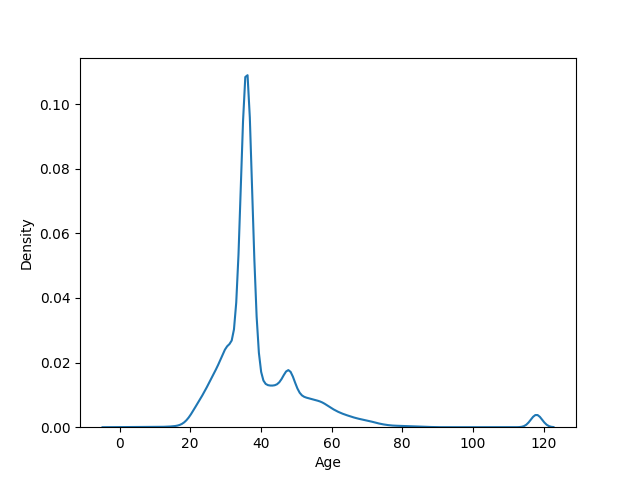

In [14]:
sns.kdeplot(data['Age'])

In [15]:
sns.histplot(data['Age'])

<Axes: xlabel='Age', ylabel='Density'>

In [16]:
#Agency
data['Agency Type'].unique()

array(['Airlines', 'Travel Agency'], dtype=object)

In [17]:
data['Agency Type'].value_counts()

Agency Type
Travel Agency    36684
Airlines         14072
Name: count, dtype: int64

In [18]:
#Destination:
data['Destination'].value_counts()

Destination
SINGAPORE                   10743
MALAYSIA                     4782
THAILAND                     4740
CHINA                        3796
AUSTRALIA                    2978
                            ...  
BHUTAN                          2
NORTHERN MARIANA ISLANDS        2
ZAMBIA                          2
LATVIA                          1
TURKMENISTAN                    1
Name: count, Length: 102, dtype: int64

In [19]:
#Distribution Channel
data['Distribution Channel'].value_counts()

Distribution Channel
Online     49865
Offline      891
Name: count, dtype: int64

In [20]:
#Product Name:
data['Product Name'].value_counts()

Product Name
Cancellation Plan                       14792
2 way Comprehensive Plan                10550
Rental Vehicle Excess Insurance          6882
Basic Plan                               4364
Bronze Plan                              3291
1 way Comprehensive Plan                 2697
Value Plan                               2171
Silver Plan                              1834
Annual Silver Plan                       1168
Ticket Protector                          844
Travel Cruise Protect                     420
Comprehensive Plan                        302
Gold Plan                                 285
24 Protect                                193
Single Trip Travel Protect Gold           164
Annual Gold Plan                          163
Premier Plan                              157
Single Trip Travel Protect Silver         134
Annual Travel Protect Gold                 85
Annual Travel Protect Silver               71
Individual Comprehensive Plan              63
Single Trip Travel Pr

In [21]:
#Commission in value :
sns.kdeplot(data['Commision (in value)'])

<Axes: xlabel='Age', ylabel='Density'>

In [22]:
#Net Sales
sns.kdeplot(data['Net Sales'])

<Axes: xlabel='Age', ylabel='Density'>

In [23]:
sns.kdeplot(data['Duration'])

<Axes: xlabel='Age', ylabel='Density'>

In [24]:
sns.histplot(data['Duration'])

<Axes: xlabel='Age', ylabel='Density'>

In [25]:
sns.barplot(data=data,x=data['Agency Type'],y=data['Net Sales'])

<Axes: xlabel='Age', ylabel='Density'>

**Observation**: Airlines has more net sales than travel agency

In [26]:
plt.xticks(rotation=90)
sns.barplot(data=data,x=data['Product Name'], y=data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

In [27]:
data.groupby(['Age']).size().reset_index().rename(columns={0:'Count'})

Age  Count
0     0      2
1     1      3
2     2      1
3     3      4
4     4      1
..  ...    ...
84   85      8
85   86      4
86   87      7
87   88      4
88  118    783

[89 rows x 2 columns]

In [28]:
data['Distribution Channel'].unique()

array(['Online', 'Offline'], dtype=object)

In [29]:
sns.countplot(data=data,x=data['Distribution Channel'])

<Axes: xlabel='Age', ylabel='Density'>

In [30]:
sns.countplot(data=data,x=data['Agency Type'],hue=data['Claim'])

<Axes: xlabel='Age', ylabel='Density'>

In [31]:
plt.xticks(rotation=90)
sns.barplot(data=data,x=data['Product Name'],y=data['Claim'])

<Axes: xlabel='Age', ylabel='Density'>

In [32]:
plt.xticks(rotation=90)
sns.barplot(data=data,x=data['Product Name'],y=data['Net Sales']);

In [33]:
sns.heatmap(pd.crosstab(data['Product Name'],data['Destination']))

<Axes: xlabel='Destination', ylabel='Product Name'>

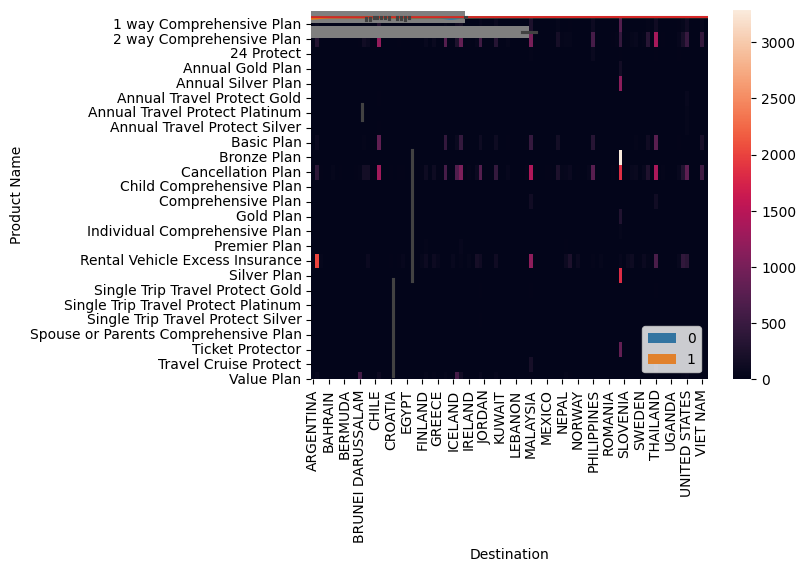

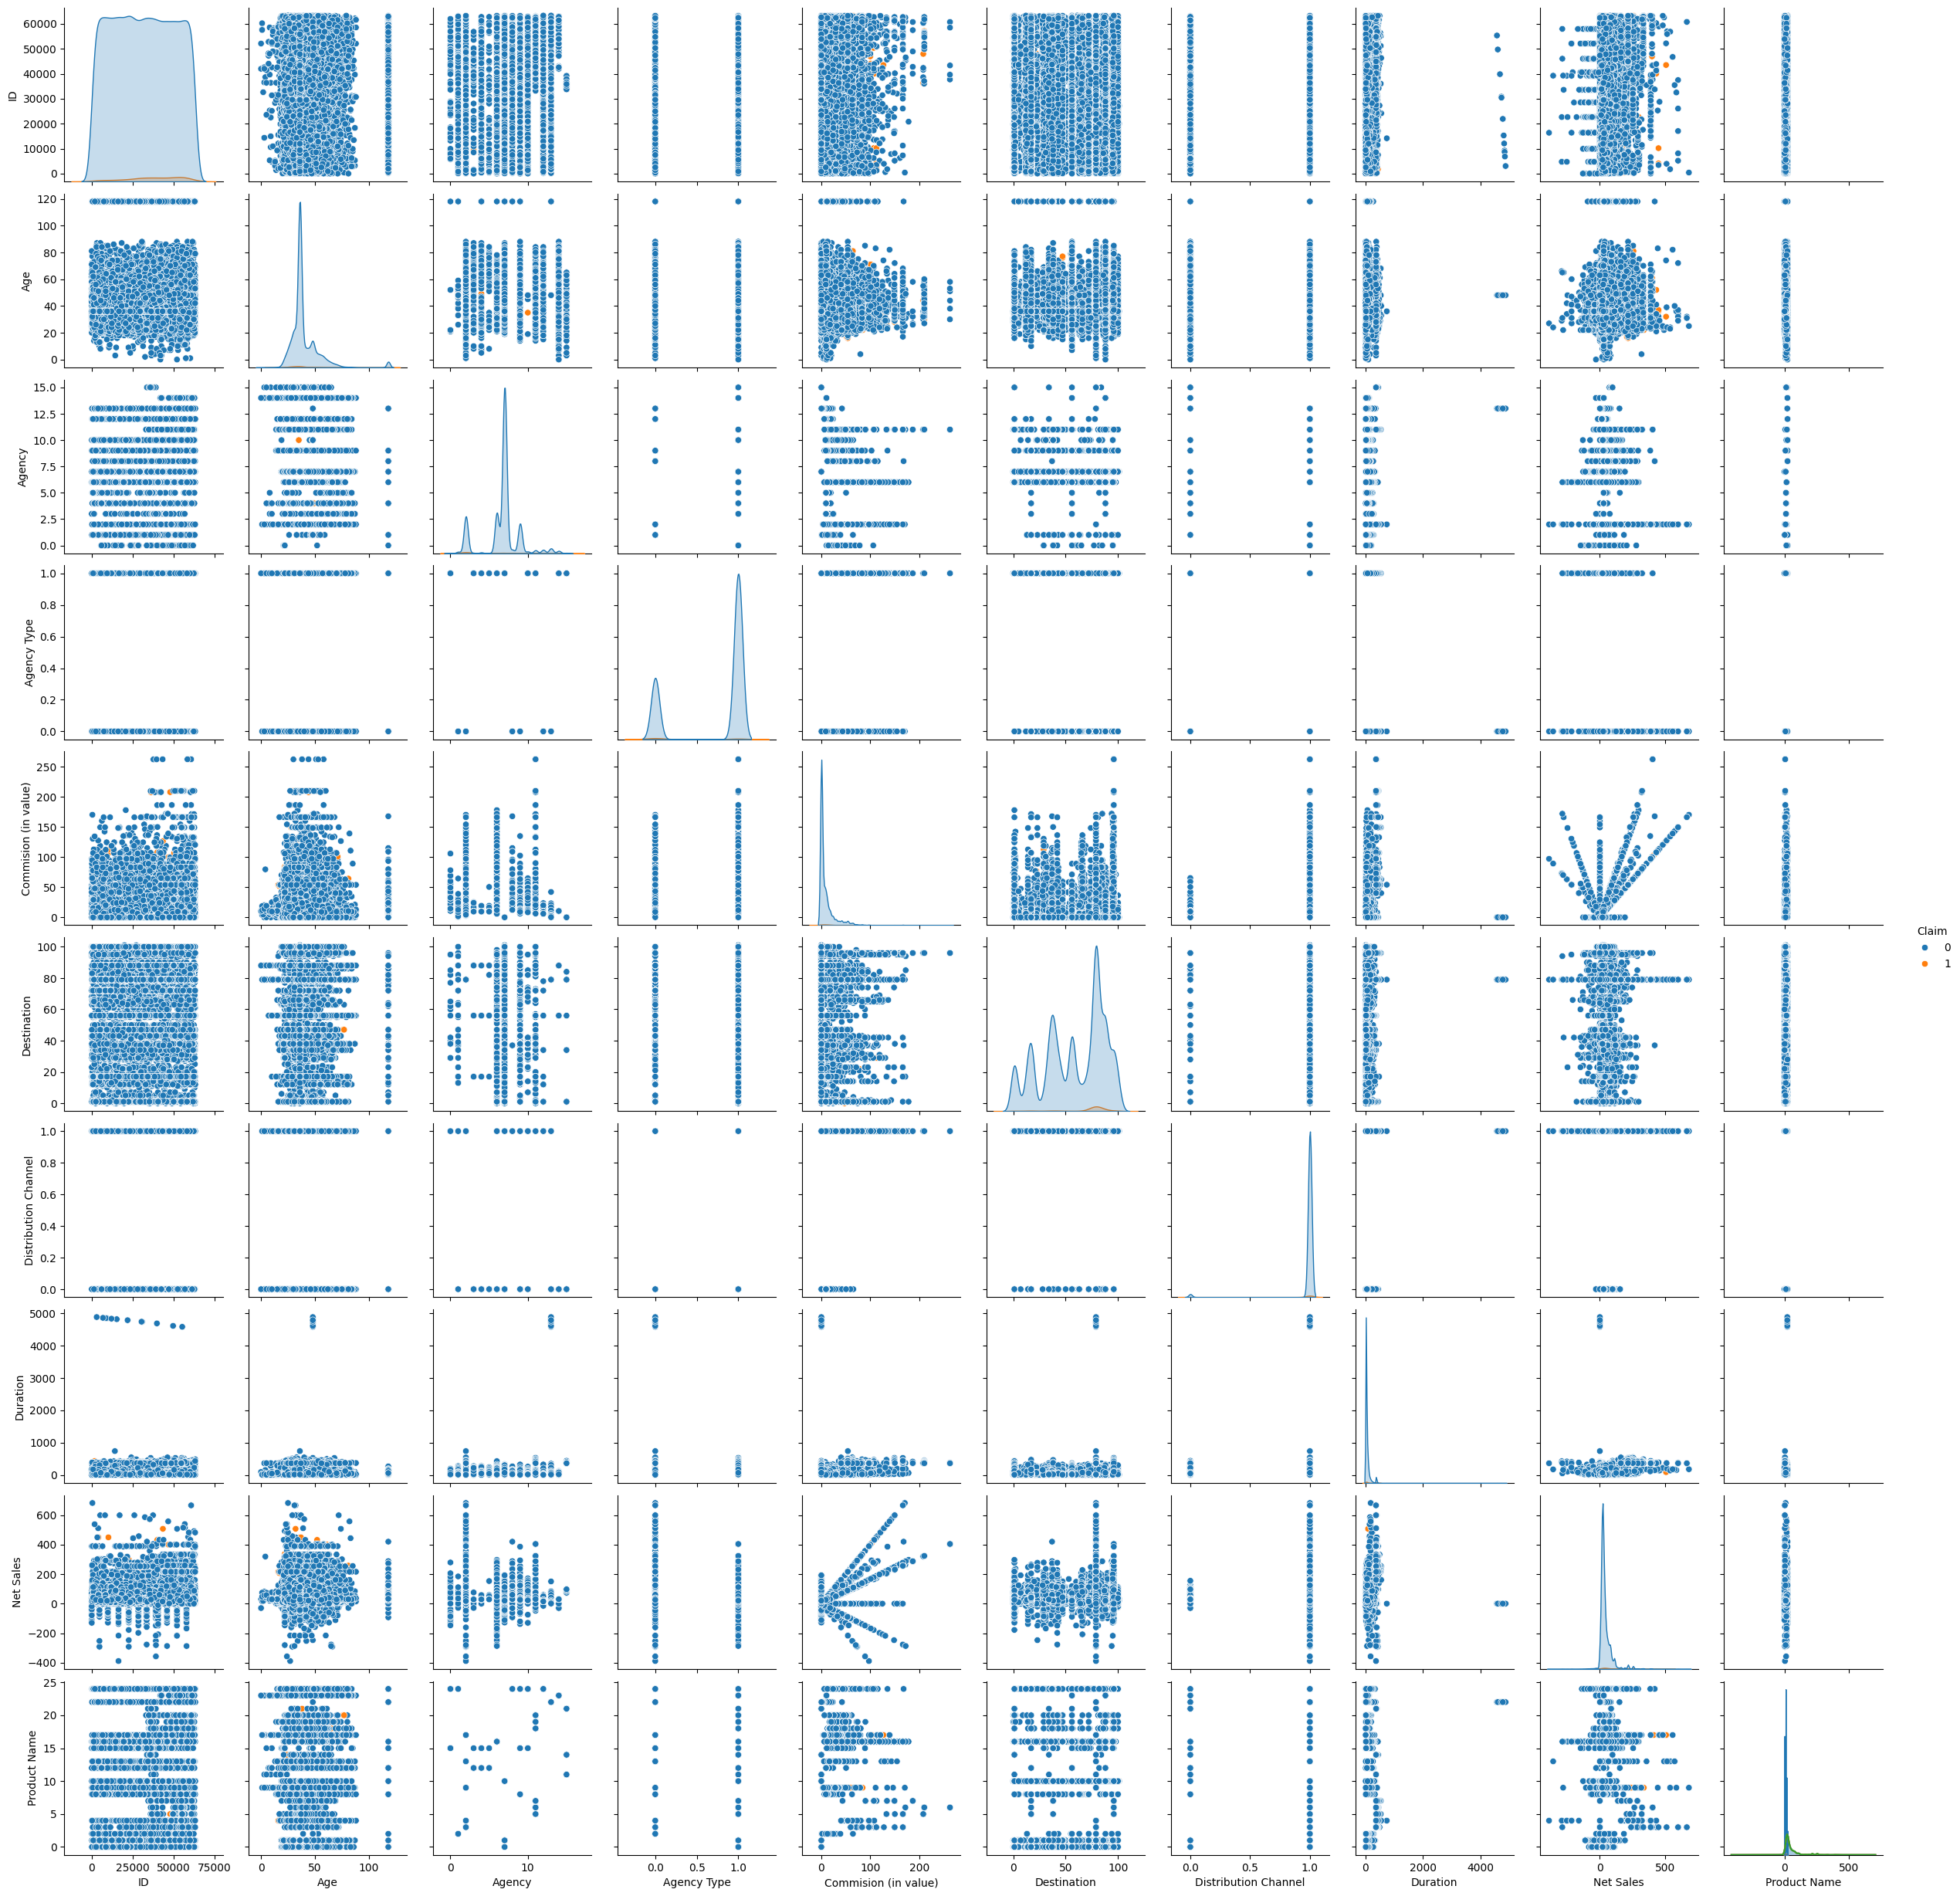

In [63]:
sns.kdeplot(data['Net Sales'])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7052\3226858093.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Net Sales']);


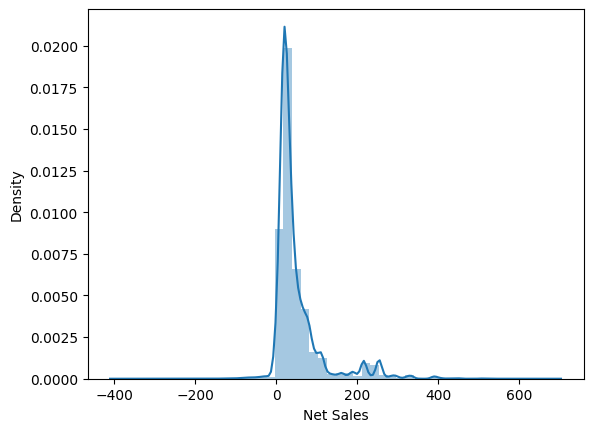

In [72]:
sns.distplot(data['Net Sales']);
plt.show();

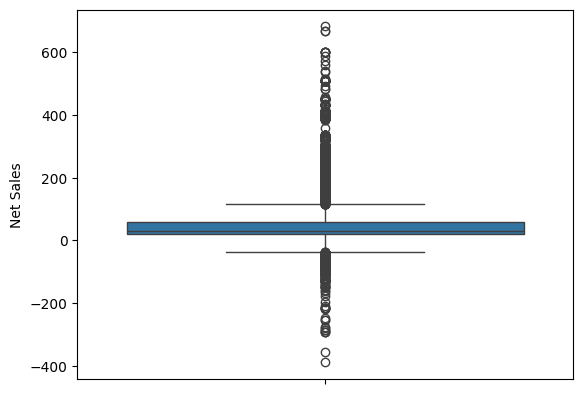

In [75]:
sns.boxplot(data['Net Sales'])
plt.show()

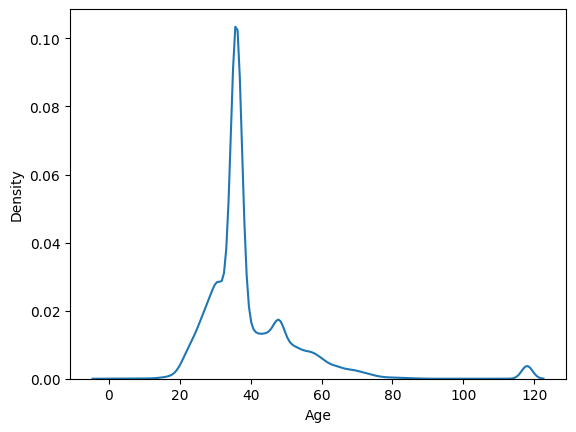

In [65]:
sns.kdeplot(data['Age'])
plt.show()

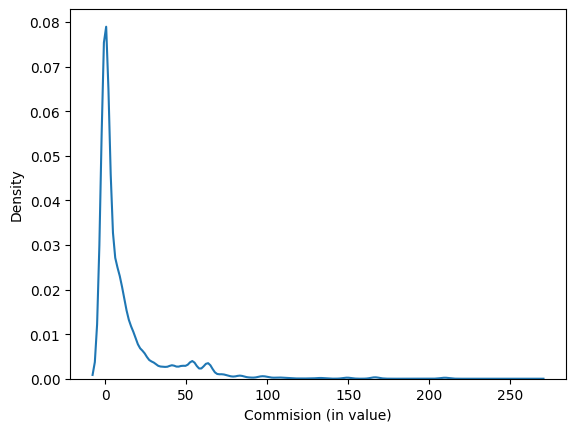

In [68]:
sns.kdeplot(data['Commision (in value)'])
plt.show()

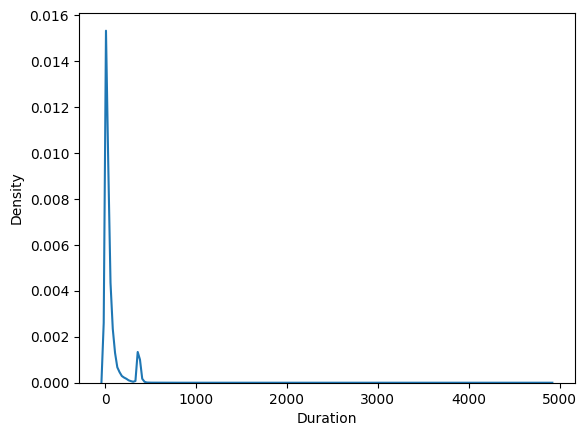

In [69]:
sns.kdeplot(data['Duration'])
plt.show()

## Outliers 

In [73]:
#Z score method for Net sales:
#upperbound and lower bound:
print('Upperbound of column:', data['Net Sales'].mean() + 3*data['Net Sales'].std())
print('Upperbound of column:', data['Net Sales'].mean() - 3*data['Net Sales'].std())

Upperbound of column: 240.21720844418059
Upperbound of column: -138.78307955900203


In [74]:
data[(data['Net Sales']<-138.78307955900203)|(data['Net Sales']>240.21720844418059)]

ID  Age Agency    Agency Type  Commision (in value)    Destination  \
8      24167   32    C2B       Airlines                 63.21      SINGAPORE   
9      19885   59    C2B       Airlines                 63.21      SINGAPORE   
55     46952   47    C2B       Airlines                 64.80      SINGAPORE   
88      4420   48    C2B       Airlines                 75.25      SINGAPORE   
89     56484   22    C2B       Airlines                 84.13      SINGAPORE   
...      ...  ...    ...            ...                   ...            ...   
62127  50307   48    LWC  Travel Agency                210.21  UNITED STATES   
62132   8529   51    C2B       Airlines                 72.94      SINGAPORE   
62135  21449   34    C2B       Airlines                 63.21      SINGAPORE   
62143  23337   44    C2B       Airlines                 63.21      SINGAPORE   
62273  56484   22    C2B       Airlines                 84.13      SINGAPORE   

      Distribution Channel  Duration Gender  Net Sales  \
8                   Online       368      M     252.85   
9                   Online       377      F     252.85   
55                  Online       372      F     259.20   
88                  Online       390      F     301.00   
89                  Online       197      F     336.50   
...                    ...       ...    ...        ...   
62127               Online       365      M     323.40   
62132               Online       366      F     291.75   
62135               Online       370      F     252.85   
62143               Online       419      F     252.85   
62273               Online       197      F     336.50   

                         Product Name  Claim  
8                  Annual Silver Plan      1  
9                  Annual Silver Plan      0  
55                 Annual Silver Plan      0  
88                 Annual Silver Plan      1  
89                        Bronze Plan      1  
...                               ...    ...  
62127  Annual Travel Protect Platinum      1  
62132              Annual Silver Plan      0  
62135              Annual Silver Plan      0  
62143              Annual Silver Plan      1  
62273                     Bronze Plan      1  

[2216 rows x 12 columns]

In [76]:
upperBound= data['Net Sales'].mean() + 3*data['Net Sales'].std()
lowerBound= data['Net Sales'].mean() - 3*data['Net Sales'].std()

In [78]:
data['Net Sales']= np.where(data['Net Sales']>upperBound,upperBound,
                           np.where(data['Net Sales']<lowerBound,lowerBound,
                           data['Net Sales']))

In [79]:
# Checking the values after capping:
data[(data['Net Sales']<-138.78307955900203)|(data['Net Sales']>240.21720844418059)]

Empty DataFrame
Columns: [ID, Age, Agency, Agency Type, Commision (in value), Destination, Distribution Channel, Duration, Gender, Net Sales, Product Name, Claim]
Index: []

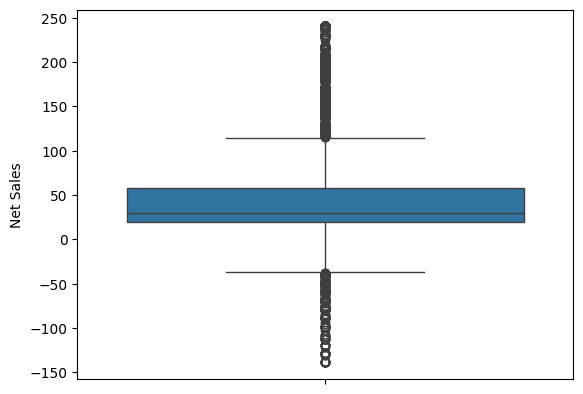

In [80]:
sns.boxplot(data['Net Sales'])
plt.show()

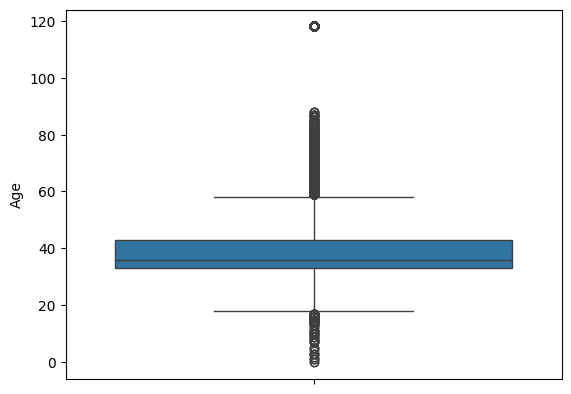

In [82]:
#Z Score method for Age Column:
sns.boxplot(data['Age'])
plt.show()

In [87]:
age_UpperBound = data['Age'].mean()+3*data['Age'].std()
age_LowerBound = data['Age'].mean()-3*data['Age'].std()
print(age_UpperBound)
print(age_LowerBound)

81.71027998991337
-2.377631646733299


In [85]:
data[(data['Age']<-2.377631646733299)|(data['Age']>81.71027998991337)] 

ID  Age Agency Agency Type  Commision (in value) Destination  \
52     60720  118    JWT    Airlines                 31.20       INDIA   
96      6201  118    ART    Airlines                 14.00       NEPAL   
115    21133  118    JWT    Airlines                 15.60       INDIA   
260    55673  118    JWT    Airlines                 12.40       INDIA   
327    18289  118    JWT    Airlines                 49.60       INDIA   
...      ...  ...    ...         ...                   ...         ...   
62183  18287  118    JWT    Airlines                 24.80       INDIA   
62238  13909  118    JWT    Airlines                 12.40       INDIA   
62254  41379  118    JWT    Airlines                 24.00       INDIA   
62277  16144  118    JZI    Airlines                 11.55    THAILAND   
62281  29597  118    JZI    Airlines                 43.40  BANGLADESH   

      Distribution Channel  Duration Gender  Net Sales Product Name  Claim  
52                  Online        25      F       78.0   Value Plan      1  
96                  Online        27      M       40.0   Value Plan      0  
115                 Online         6      F       39.0   Value Plan      0  
260                 Online         1      M       31.0   Value Plan      0  
327                 Online         1      M      124.0   Value Plan      0  
...                    ...       ...    ...        ...          ...    ...  
62183               Online        52      F       62.0   Value Plan      0  
62238               Online        62      M       31.0   Value Plan      0  
62254               Online        24      M       60.0   Value Plan      0  
62277               Online        38    NaN       33.0   Basic Plan      0  
62281               Online        63    NaN      124.0   Basic Plan      0  

[982 rows x 12 columns]

In [89]:
#capping of outliers:
data['Age']=np.where(data['Age']>age_UpperBound,age_UpperBound,
                    np.where(data['Age']<age_LowerBound,age_LowerBound,
                            data['Age']))

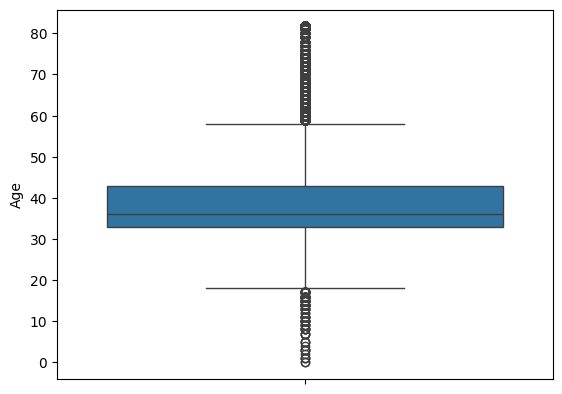

In [92]:
sns.boxplot(data['Age'])
plt.show()

In [96]:
#'Commision (in value)' IQR:
percentile25=data['Commision (in value)'].quantile(0.25)
percentile75=data['Commision (in value)'].quantile(0.75)
print(percentile25)
print(percentile75)

0.0
14.44


In [97]:
iqr=percentile75-percentile25
print(iqr)

14.44


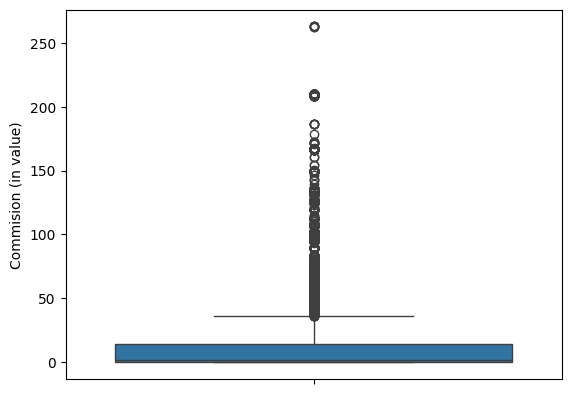

In [98]:
sns.boxplot(data['Commision (in value)'])
plt.show()

In [99]:
com_UpperBound=percentile75+1.5*iqr
print(com_UpperBound)

36.1


In [100]:
data[(data['Commision (in value)']>com_UpperBound)]

ID       Age Agency    Agency Type  Commision (in value)  \
5       9279  39.00000    CWT  Travel Agency                 59.40   
8      24167  32.00000    C2B       Airlines                 63.21   
9      19885  59.00000    C2B       Airlines                 63.21   
14     60638  50.00000    C2B       Airlines                 54.00   
16     46954  67.00000    C2B       Airlines                 54.00   
...      ...       ...    ...            ...                   ...   
62237  54765  37.00000    C2B       Airlines                 40.25   
62266  50324  49.00000    JZI       Airlines                 43.75   
62268  60444  42.00000    C2B       Airlines                 54.00   
62273  56484  22.00000    C2B       Airlines                 84.13   
62281  29597  81.71028    JZI       Airlines                 43.40   

      Destination Distribution Channel  Duration Gender   Net Sales  \
5       AUSTRALIA               Online        78    NaN   99.000000   
8       SINGAPORE               Online       368      M  240.217208   
9       SINGAPORE               Online       377      F  240.217208   
14      SINGAPORE               Online       364      M  216.000000   
16      SINGAPORE               Online       371      F  216.000000   
...           ...                  ...       ...    ...         ...   
62237   SINGAPORE               Online       367      M  161.000000   
62266     FINLAND               Online       161      F  125.000000   
62268   SINGAPORE               Online       364      F  216.000000   
62273   SINGAPORE               Online       197      F  240.217208   
62281  BANGLADESH               Online        63    NaN  124.000000   

                          Product Name  Claim  
5      Rental Vehicle Excess Insurance      0  
8                   Annual Silver Plan      1  
9                   Annual Silver Plan      0  
14                  Annual Silver Plan      0  
16                  Annual Silver Plan      0  
...                                ...    ...  
62237               Annual Silver Plan      0  
62266                       Value Plan      0  
62268               Annual Silver Plan      1  
62273                      Bronze Plan      1  
62281                       Basic Plan      0  

[7362 rows x 12 columns]

In [101]:
#Cappping the outlier values:
data['Commision (in value)']=np.where(data['Commision (in value)']>com_UpperBound,com_UpperBound,
                                     data['Commision (in value)'])

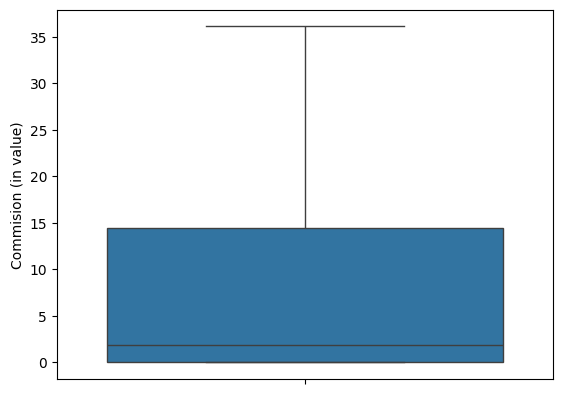

In [102]:
sns.boxplot(data['Commision (in value)'])
plt.show()

In [104]:
# 'Duration' IQR 
dpercentile75=data['Duration'].quantile(0.75)
dpercentile25=data['Duration'].quantile(0.25)
print(dpercentile75)
print(dpercentile25)

59.0
10.0


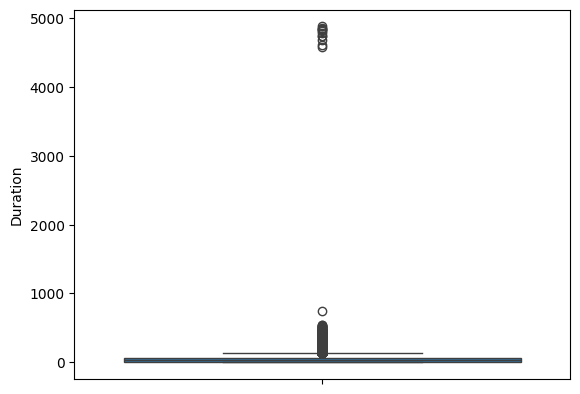

In [105]:
sns.boxplot(data['Duration'])
plt.show()

In [107]:
diqr=dpercentile75-dpercentile25 
print(diqr)

49.0


In [108]:
duration_UpperBound = data['Duration']+ 1.5*diqr
duration_LowerBound = data['Duration']- 1.5*diqr

In [110]:
data['Duration']=np.where(data['Duration']>duration_UpperBound,duration_UpperBound,
                         np.where(data['Duration']<duration_LowerBound,duration_LowerBound,
                                 data['Duration']))

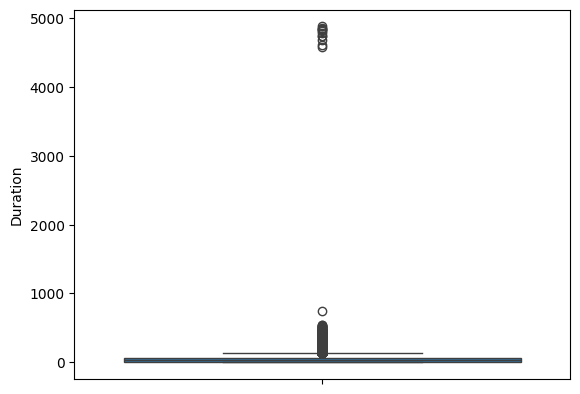

In [113]:
sns.boxplot(data['Duration'])
plt.show()

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

# For creating a dataframe with number columns
df_num=df.select_dtypes(include=['int64','float64'])

for i in feature:
    LL, UL = remove_outlier(df_num[i])
    df_num[i] = np.where(df_num[i] > UL, UL, df_num[i])
    df_num[i] = np.where(df_num[i] < LL, LL, df_num[i])
    
# For plotting box plot
plt.figure(figsize = (12,10))
feature = df_num.columns
for i in range(len(feature)):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(x = df_num[feature[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature[i]))
    plt.tight_layout() 

In [34]:
pd.DataFrame(data.groupby(['Product Name','Destination']).size().reset_index().rename(columns={0:'Count'}))

Product Name           Destination  Count
0    1 way Comprehensive Plan             ARGENTINA      1
1    1 way Comprehensive Plan             AUSTRALIA     73
2    1 way Comprehensive Plan               AUSTRIA      3
3    1 way Comprehensive Plan            AZERBAIJAN      1
4    1 way Comprehensive Plan               BAHRAIN      1
..                        ...                   ...    ...
549                Value Plan  UNITED ARAB EMIRATES      8
550                Value Plan        UNITED KINGDOM     46
551                Value Plan         UNITED STATES     77
552                Value Plan            UZBEKISTAN      1
553                Value Plan              VIET NAM      7

[554 rows x 3 columns]

In [35]:
data.groupby(['Destination','Claim']).size().reset_index().rename(columns={0:'Count'})

Destination  Claim  Count
0     ARGENTINA      0     15
1     ARGENTINA      1      1
2     AUSTRALIA      0   2940
3     AUSTRALIA      1     38
4       AUSTRIA      0     81
..          ...    ...    ...
137     VANUATU      0      3
138   VENEZUELA      0      4
139    VIET NAM      0   1284
140    VIET NAM      1     12
141      ZAMBIA      0      2

[142 rows x 3 columns]

In [36]:
data['Product Name'].mode()

0    Cancellation Plan
Name: Product Name, dtype: object

In [37]:
data.groupby(['Destination','Distribution Channel']).size().reset_index().rename(columns={0:'Count'})

Destination Distribution Channel  Count
0     ARGENTINA               Online     16
1     AUSTRALIA              Offline     22
2     AUSTRALIA               Online   2956
3       AUSTRIA               Online     81
4    AZERBAIJAN               Online      6
..          ...                  ...    ...
120  UZBEKISTAN               Online     10
121     VANUATU               Online      3
122   VENEZUELA               Online      4
123    VIET NAM               Online   1296
124      ZAMBIA               Online      2

[125 rows x 3 columns]

In [38]:
sns.barplot(data=data,x='Age',y='Distribution Channel')

<Axes: xlabel='Destination', ylabel='Product Name'>

In [39]:
data['Net Sales'].max()

682.0

In [40]:
data['Destination'].mode()

0    SINGAPORE
Name: Destination, dtype: object

In [41]:
data

ID  Age Agency    Agency Type  Commision (in value)    Destination  \
0      45341   28    C2B       Airlines                 28.13      SINGAPORE   
1      12958   37    JZI       Airlines                 12.95    PHILIPPINES   
2      18233   27    EPX  Travel Agency                  0.00  UNITED STATES   
3      31742   36    EPX  Travel Agency                  0.00   SAUDI ARABIA   
4      14381   26    CWT  Travel Agency                 23.76       THAILAND   
...      ...  ...    ...            ...                   ...            ...   
62281  29597  118    JZI       Airlines                 43.40     BANGLADESH   
62282  58235   31    CWT  Travel Agency                 29.70      AUSTRALIA   
62283  36315   36    EPX  Travel Agency                  0.00      HONG KONG   
62284   2511   56    JZI       Airlines                  9.10      AUSTRALIA   
62287   5550   44    EPX  Travel Agency                  0.00       THAILAND   

      Distribution Channel  Duration  Net Sales  \
0                   Online        34      112.5   
1                   Online        53       37.0   
2                   Online        28       13.0   
3                   Online         1       34.0   
4                   Online        33       39.6   
...                    ...       ...        ...   
62281               Online        63      124.0   
62282               Online        15       49.5   
62283               Online        17       28.0   
62284               Online         9       26.0   
62287               Online        70       20.0   

                          Product Name  Claim  
0                          Silver Plan      1  
1                           Basic Plan      0  
2                    Cancellation Plan      0  
3                    Cancellation Plan      0  
4      Rental Vehicle Excess Insurance      0  
...                                ...    ...  
62281                       Basic Plan      0  
62282  Rental Vehicle Excess Insurance      0  
62283         2 way Comprehensive Plan      0  
62284                       Basic Plan      0  
62287                Cancellation Plan      0  

[50756 rows x 11 columns]

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50756 entries, 0 to 62287
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50756 non-null  int64  
 1   Age                   50756 non-null  int64  
 2   Agency                50756 non-null  object 
 3   Agency Type           50756 non-null  object 
 4   Commision (in value)  50756 non-null  float64
 5   Destination           50756 non-null  object 
 6   Distribution Channel  50756 non-null  object 
 7   Duration              50756 non-null  int64  
 8   Net Sales             50756 non-null  float64
 9   Product Name          50756 non-null  object 
 10  Claim                 50756 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.6+ MB


In [43]:
#Categorical Conversion:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



feature: Agency
['C2B', 'JZI', 'EPX', 'CWT', 'JWT', ..., 'CBH', 'TTW', 'CCR', 'ADM', 'CSR']
Length: 16
Categories (16, object): ['ADM', 'ART', 'C2B', 'CBH', ..., 'RAB', 'SSI', 'TST', 'TTW']
[ 2  9  7  6  8 14 13 12  1 11 10  3 15  4  0  5]


feature: Agency Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Destination
['SINGAPORE', 'PHILIPPINES', 'UNITED STATES', 'SAUDI ARABIA', 'THAILAND', ..., 'VENEZUELA', 'TUNISIA', 'ZAMBIA', 'LATVIA', 'TURKMENISTAN']
Length: 102
Categories (102, object): ['ARGENTINA', 'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN', ..., 'VANUATU', 'VENEZUELA', 'VIET NAM', 'ZAMBIA']
[ 79  72  96  78  88   1  34  17  95   4  65  85  43  56  38  37   5  13
  29 100  22  42  31  47  66  12  14  32  64  83  63  71  41  35  55  86
  68  40  94  11  20  81  82   7  28  69  77  74  90  36   2  23  70  50
  73  58  44  61  92  19  59  27  18  60  93  87  84  46  57  97  75  45
  24  25  30  76  49  53  52  80  33  26  62  98  

In [44]:
data

ID  Age  Agency  Agency Type  Commision (in value)  Destination  \
0      45341   28       2            0                 28.13           79   
1      12958   37       9            0                 12.95           72   
2      18233   27       7            1                  0.00           96   
3      31742   36       7            1                  0.00           78   
4      14381   26       6            1                 23.76           88   
...      ...  ...     ...          ...                   ...          ...   
62281  29597  118       9            0                 43.40            5   
62282  58235   31       6            1                 29.70            1   
62283  36315   36       7            1                  0.00           34   
62284   2511   56       9            0                  9.10            1   
62287   5550   44       7            1                  0.00           88   

       Distribution Channel  Duration  Net Sales  Product Name  Claim  
0                         1        34      112.5            17      1  
1                         1        53       37.0             8      0  
2                         1        28       13.0            10      0  
3                         1         1       34.0            10      0  
4                         1        33       39.6            16      0  
...                     ...       ...        ...           ...    ...  
62281                     1        63      124.0             8      0  
62282                     1        15       49.5            16      0  
62283                     1        17       28.0             1      0  
62284                     1         9       26.0             8      0  
62287                     1        70       20.0            10      0  

[50756 rows x 11 columns]

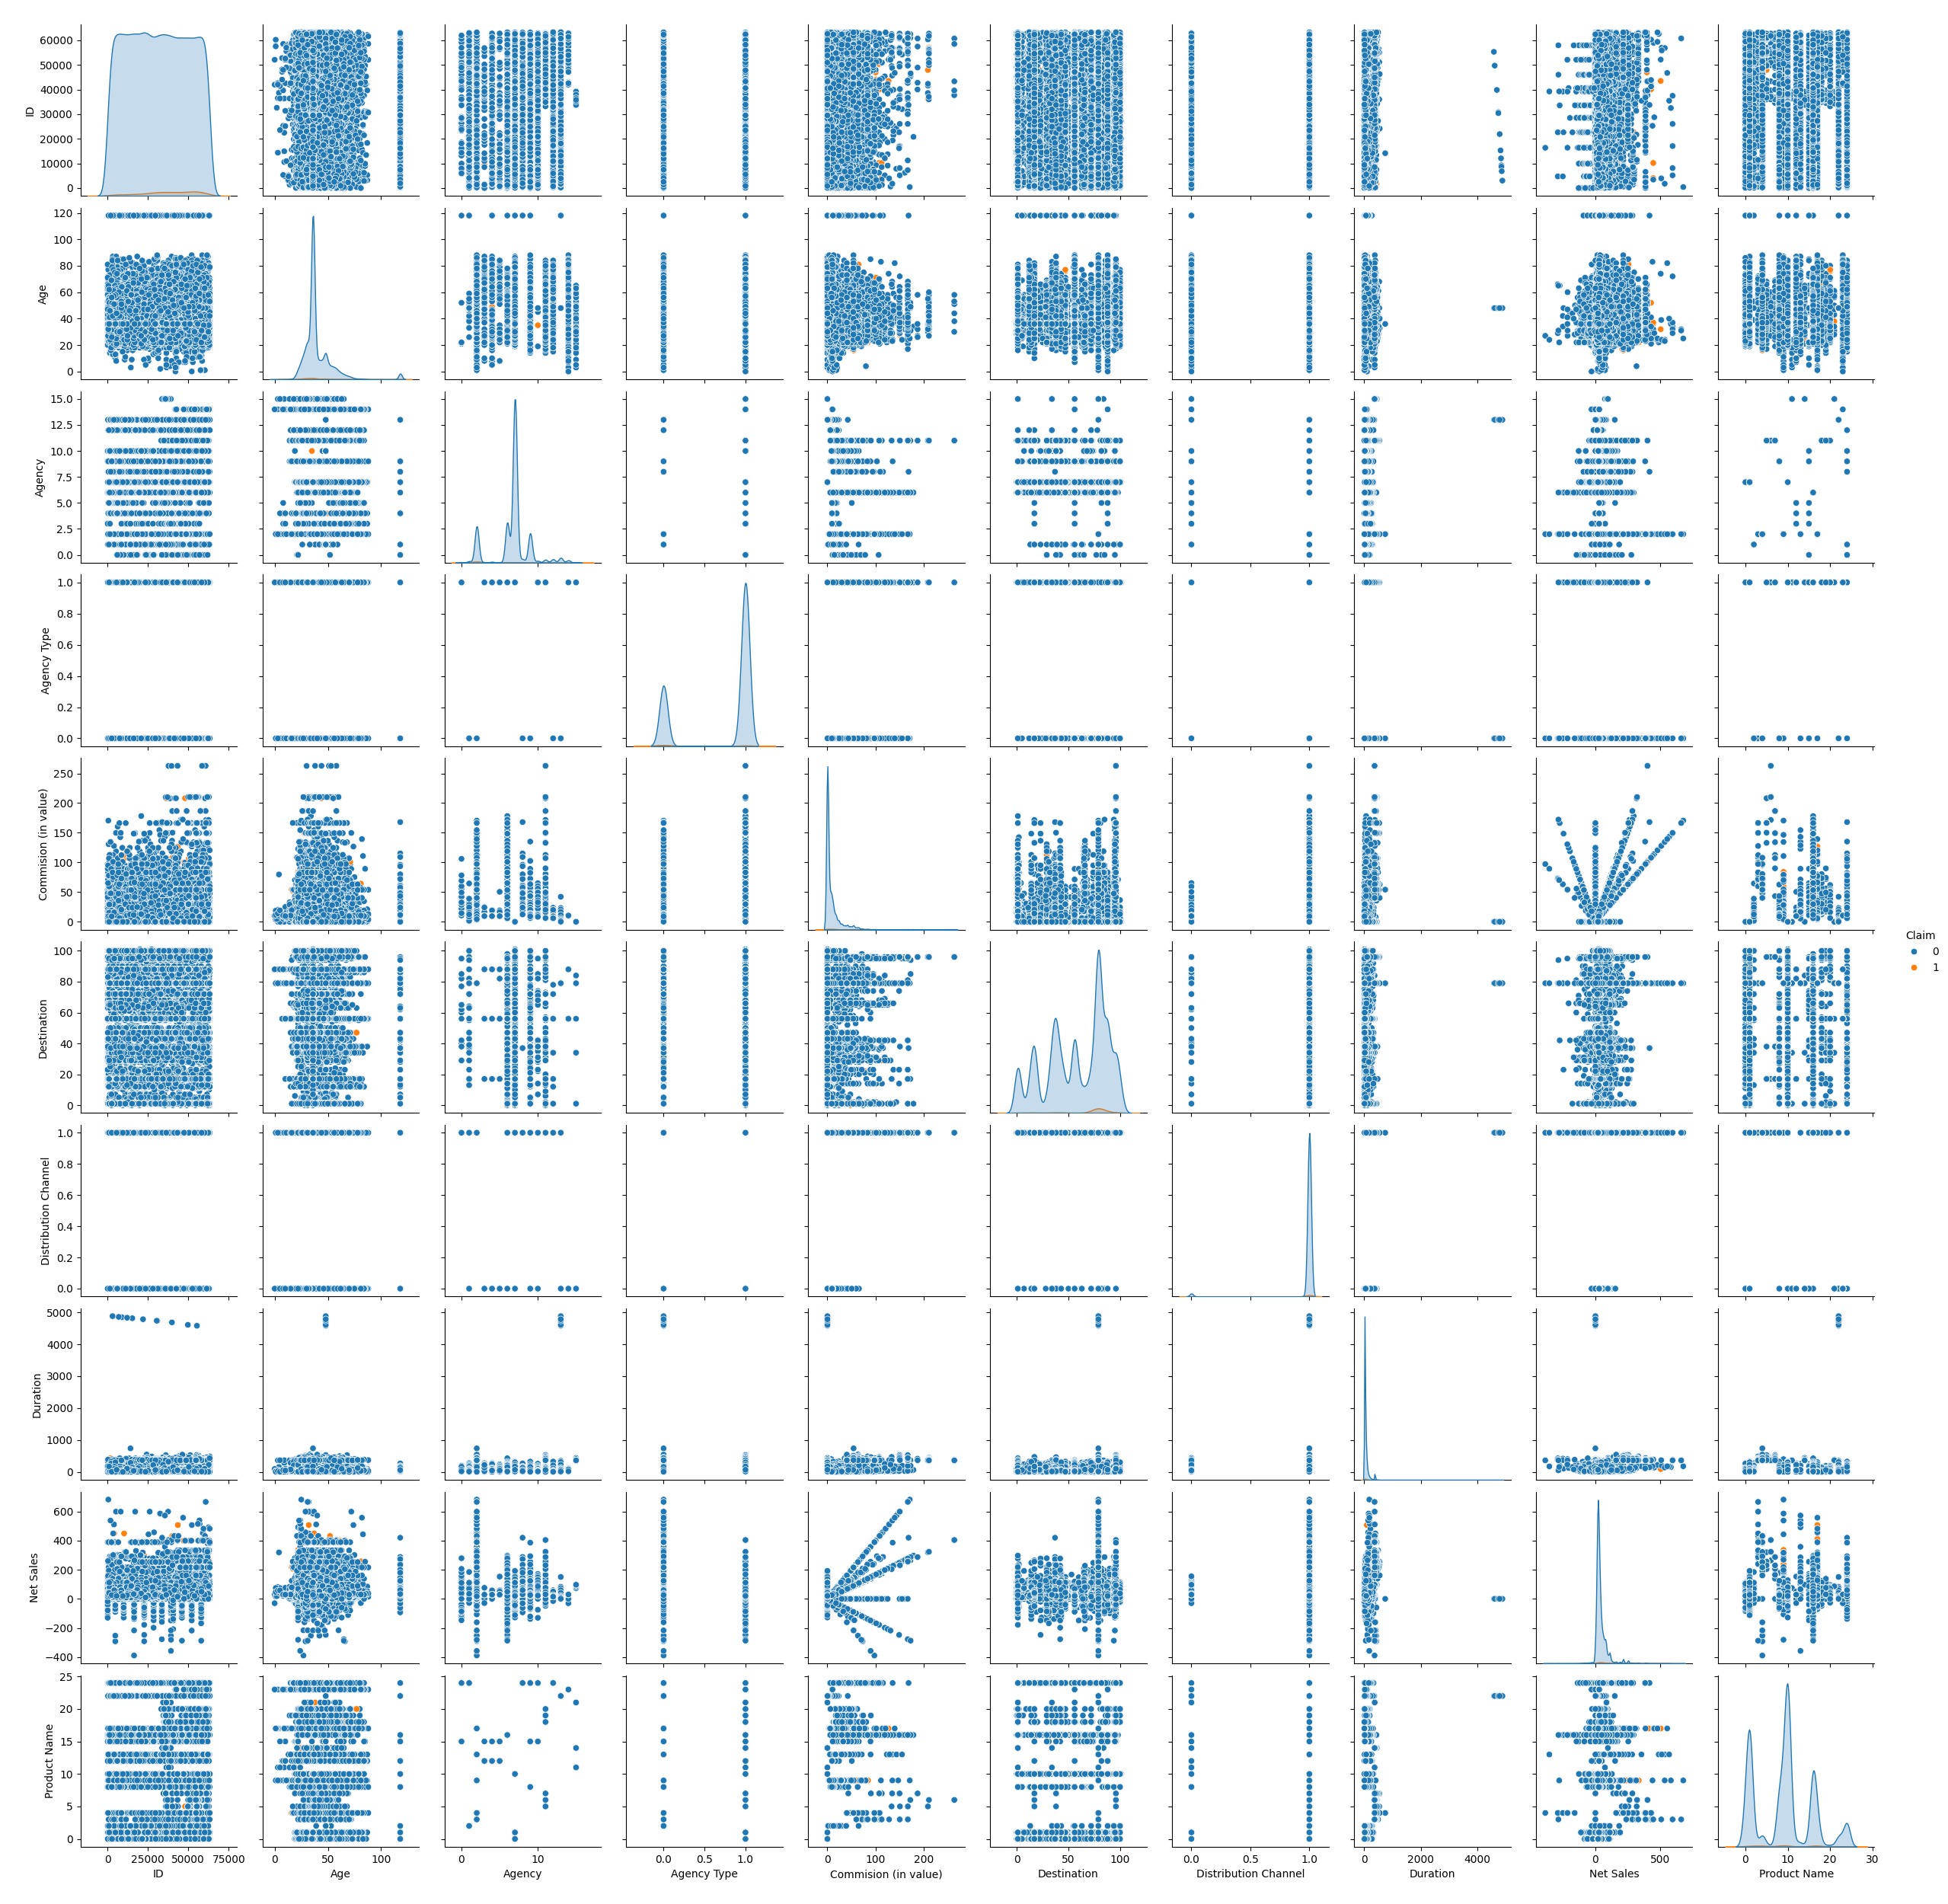

In [45]:
sns.pairplot(data,hue='Claim')

In [46]:
data.drop('ID',axis=1,inplace=True)

In [47]:
data

Age  Agency  Agency Type  Commision (in value)  Destination  \
0       28       2            0                 28.13           79   
1       37       9            0                 12.95           72   
2       27       7            1                  0.00           96   
3       36       7            1                  0.00           78   
4       26       6            1                 23.76           88   
...    ...     ...          ...                   ...          ...   
62281  118       9            0                 43.40            5   
62282   31       6            1                 29.70            1   
62283   36       7            1                  0.00           34   
62284   56       9            0                  9.10            1   
62287   44       7            1                  0.00           88   

       Distribution Channel  Duration  Net Sales  Product Name  Claim  
0                         1        34      112.5            17      1  
1                         1        53       37.0             8      0  
2                         1        28       13.0            10      0  
3                         1         1       34.0            10      0  
4                         1        33       39.6            16      0  
...                     ...       ...        ...           ...    ...  
62281                     1        63      124.0             8      0  
62282                     1        15       49.5            16      0  
62283                     1        17       28.0             1      0  
62284                     1         9       26.0             8      0  
62287                     1        70       20.0            10      0  

[50756 rows x 10 columns]

In [48]:
#Scaling of values: StandardScaler() for age, commision, duration, net sales:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler=StandardScaler()

In [50]:
for feature in data.columns:
    if data[feature].dtype =='int64' or data[feature].dtype=='float64':
        reshaped = data[feature].values.reshape(-1, 1)
        scaled_feature = scaler.fit_transform(reshaped) 
        data[feature] = scaled_feature 

In [51]:
data

Age  Agency  Agency Type  Commision (in value)  Destination  \
0     -0.851249       2            0              0.917025           79   
1     -0.208398       9            0              0.154277           72   
2     -0.922676       7            1             -0.496421           96   
3     -0.279826       7            1             -0.496421           78   
4     -0.994104       6            1              0.697446           88   
...         ...     ...          ...                   ...          ...   
62281  5.577255       9            0              1.684295            5   
62282 -0.636965       6            1              0.995912            1   
62283 -0.279826       7            1             -0.496421           34   
62284  1.148730       9            0             -0.039174            1   
62287  0.291596       7            1             -0.496421           88   

       Distribution Channel  Duration  Net Sales  Product Name     Claim  
0                         1 -0.150898   1.460007            17  7.335673  
1                         1  0.031881  -0.077772             8 -0.136320  
2                         1 -0.208618  -0.566603            10 -0.136320  
3                         1 -0.468356  -0.138876            10 -0.136320  
4                         1 -0.160518  -0.024816            16 -0.136320  
...                     ...       ...        ...           ...       ...  
62281                     1  0.128081   1.694239             8 -0.136320  
62282                     1 -0.333677   0.176827            16 -0.136320  
62283                     1 -0.314437  -0.261084             1 -0.136320  
62284                     1 -0.391397  -0.301820             8 -0.136320  
62287                     1  0.195420  -0.424027            10 -0.136320  

[50756 rows x 10 columns]

In [52]:
data.drop('Claim',axis=1,inplace=True)

In [56]:
data['Claim']=data1['Claim']

In [57]:
data

Age  Agency  Agency Type  Commision (in value)  Destination  \
0     -0.851249       2            0              0.917025           79   
1     -0.208398       9            0              0.154277           72   
2     -0.922676       7            1             -0.496421           96   
3     -0.279826       7            1             -0.496421           78   
4     -0.994104       6            1              0.697446           88   
...         ...     ...          ...                   ...          ...   
62281  5.577255       9            0              1.684295            5   
62282 -0.636965       6            1              0.995912            1   
62283 -0.279826       7            1             -0.496421           34   
62284  1.148730       9            0             -0.039174            1   
62287  0.291596       7            1             -0.496421           88   

       Distribution Channel  Duration  Net Sales  Product Name  Claim  
0                         1 -0.150898   1.460007            17    NaN  
1                         1  0.031881  -0.077772             8    NaN  
2                         1 -0.208618  -0.566603            10    NaN  
3                         1 -0.468356  -0.138876            10    NaN  
4                         1 -0.160518  -0.024816            16    NaN  
...                     ...       ...        ...           ...    ...  
62281                     1  0.128081   1.694239             8    NaN  
62282                     1 -0.333677   0.176827            16    NaN  
62283                     1 -0.314437  -0.261084             1    NaN  
62284                     1 -0.391397  -0.301820             8    NaN  
62287                     1  0.195420  -0.424027            10    NaN  

[50756 rows x 10 columns]

In [ ]:
#Spilt test and train data:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(data.drop('Claim',axis=1),data[['Claim']],test_size=0.2,random_state=1)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
data['Claim'].value_counts(normalize=True)*100

In [54]:
vals={'Claim':[]}
data1=pd.DataFrame(vals)
data1

Empty DataFrame
Columns: [Claim]
Index: []

In [55]:
data1['Claim']=data['Claim']

KeyError: 'Claim'

In [ ]:
#Model usage:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
#KNN:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
#KNN Prediction:
y_pred=knn.predict(X_test)

In [ ]:
#acuracy score:
from sklearn.metrics import accuracy_score
accuracykn = accuracy_score(y_test, y_pred)
print("Accuracy of KNN algorithm:", accuracykn)

In [ ]:
knn_proba=knn.predict_proba(X_test)
knn_proba

In [ ]:
#Logistic Regression Classifier:
logisticRegression=LogisticRegression()

In [ ]:
# Model Training
logisticRegression.fit(X_train,y_train)

In [ ]:
#Model prediction:
y_predlr=logisticRegression.predict(X_test)

In [ ]:
accuracylr = accuracy_score(y_test, y_predlr)
print("Accuracy of LogisticRegression algorithm:", accuracylr)

In [ ]:
logisticRegression_proba=knn.predict_proba(X_test)
logisticRegression_proba

In [ ]:
#KNN
y_train_deci_knn=knn.predict_proba(X_train)
y_test_deci_knn=knn.predict_proba(X_test)
#LR
y_train_deci_lr=logisticRegression.decision_function(X_train)
y_test_deci_lr=logisticRegression.decision_function(X_test)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
#AUC AND ROC FOR KNN:(Test Dataset)
l_fpr,l_tpr,threshold=roc_curve(y_test,y_test_deci_knn[:, 1])
auc_l=auc(l_fpr,l_tpr)
plt.plot(l_fpr, l_tpr, linestyle='-',label= 'KNN (auc=%0.3f)' %auc_l)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
#AUC AND ROC FOR Logistic Regression:(Test Dataset)
lr_fpr,lr_tpr,threshold=roc_curve(y_test,y_test_deci_lr)
auc_l=auc(lr_fpr,lr_tpr)
plt.plot(lr_fpr, lr_tpr, linestyle='-',label= 'Logistic (auc=%0.3f)' %auc_l)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
#Confusion Matrix:
from sklearn.metrics import confusion_matrix

In [ ]:
#Confusion Matrix for Logistic Regression:
print('Confusion Matrix For Logistic Regression:')
pd.DataFrame(confusion_matrix(y_test, y_predlr),columns=list(range(0,2)))

In [ ]:
#Confusion Matrix for KNN:
print('Confusion Matrix For KNN:')
pd.DataFrame(confusion_matrix(y_test, y_pred),columns=list(range(0,2)))

In [ ]:
#Classification Report:
from sklearn.metrics import classification_report

In [ ]:
# Classification Report for KNN:
print('Classification Report for KNN:')
print(classification_report(y_test, y_pred))

In [ ]:
# Classification Report for Logistic Regression:
print('Classification Report for Logistic Regression:')
print(classification_report(y_test, y_predlr))